In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


#read community file date
com = pd.read_csv("community/FB_groups_States_abortion.csv", sep= ",")
com['type'] = 'abortion'

df = pd.read_csv("community/FB_groups_States_climate_change.csv", sep=",")
df['type'] ='climate'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_coronavirus.csv",sep=",")
df['type'] ='covid'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_crime.csv", sep= ",")
df['type'] = 'crime'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_economy.csv", sep=",")
df['type'] = 'economy'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_gun_policy.csv", sep=",")
df['type'] = 'gun'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_immigration.csv", sep=",")
df['type']='immigration'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_racism.csv", sep=",")
df['type'] = 'racism'
com = com.append(df, ignore_index=True)

df = pd.read_csv("community/FB_groups_States_supreme_court.csv", sep=",")
df['type'] ='supreme'
com = com.append(df, ignore_index=True)

com['group'] = 'community'

In [2]:
#read political file date
pol = pd.read_csv("political/Topics_FB_Political_Posts_per_partyabortion.csv", sep= ",")
pol['type'] = 'abortion'

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyclimate_change.csv", sep=",")
df['type'] ='climate'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partycoronavirus.csv",sep=",")
df['type'] ='covid'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partycrime.csv", sep= ",")
df['type'] = 'crime'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyeconomy.csv", sep=",")
df['type'] = 'economy'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partygun_policy.csv", sep=",")
df['type'] = 'gun'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyimmigration.csv", sep=",")
df['type']='immigration'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partyracism.csv", sep=",")
df['type'] = 'racism'
pol = pol.append(df, ignore_index=True)

df = pd.read_csv("political/Topics_FB_Political_Posts_per_partysupreme_court.csv", sep=",")
df['type'] ='supreme'
pol = pol.append(df, ignore_index=True)

pol['group'] = 'political'

In [3]:
#read news file date
new = pd.read_csv("news/FB_groups_News_Media_Outlets_abortion.csv", sep= ",")
new['type'] = 'abortion'

df = pd.read_csv("news/FB_groups_News_Media_Outlets_climate_change.csv", sep=",")
df['type'] ='climate'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_coronavirus.csv",sep=",")
df['type'] ='covid'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_crime.csv", sep= ",")
df['type'] = 'crime'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_economy.csv", sep=",")
df['type'] = 'economy'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_gun_policy.csv", sep=",")
df['type'] = 'gun'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_immigration.csv", sep=",")
df['type']='immigration'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_racism.csv", sep=",")
df['type'] = 'racism'
new = new.append(df, ignore_index=True)

df = pd.read_csv("news/FB_groups_News_Media_Outlets_supreme_court.csv", sep=",")
df['type'] ='supreme'
new = new.append(df, ignore_index=True)

new['group'] = 'news'

In [4]:
#remove NaN values in page name and replace with name
pol.rename(columns = {'Group Name': 'name'}, inplace=True)
new.rename(columns = {'Page Name': 'name'}, inplace=True)
com.name.fillna(com['Group Name'], inplace = True)

In [5]:
#transfer political values to community
cond = []

temp = com.name.tolist()
for x in temp:
    if 'Trump' in x:
        cond.append(x)
    if 'Democr' in x:
        cond.append(x)
    if 'Repub' in x:
        cond.append(x)
    if 'repub' in x:
        cond.append(x)
        
print(len(cond))
#v is index
v = []
for x in range(len(com['name'])):
    if com['name'][x] in cond:
        v.append(x)
print 

print(len(v))
for i in v:
    pol = pol.append(com.iloc[i])

com.drop(
    labels = v,
    axis =0,
    inplace=True
)

1104
1104


In [6]:
t = com
t = t.append(pol, ignore_index=True)
t = t.append(new, ignore_index=True)

In [7]:
t['converted_date'] = pd.to_datetime(t['Created'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [8]:
t['converted_date'] = t['converted_date'].dt.date

In [9]:
df = t.groupby(['converted_date', 'group']).count()

In [10]:
df.head()

Unnamed: 0  name  Page or Account URL  List  State  \
converted_date group                                                           
2020-08-18     community         330   330                  309   309    309   
               news              983   983                    0     0    983   
               political          42    42                    0     0      0   
2020-08-19     community         343   343                  325   325    325   
               news              912   912                    0     0    912   

                          state  Facebook Id  Group Name  User Name  \
converted_date group                                                  
2020-08-18     community    309          330         330         21   
               news           0          983           0        978   
               political      0           42           0          6   
2020-08-19     community    325          343         343         18   
               news           0          912           0        907   

                          Likes at Posting  ...  Sponsor Name  \
converted_date group                        ...                 
2020-08-18     community               302  ...             0   
               news                    975  ...             4   
               political                33  ...             0   
2020-08-19     community               317  ...             0   
               news                    909  ...             1   

                          Total Interactions  Overperforming Score  \
converted_date group                                                 
2020-08-18     community                 330                   330   
               news                      983                   983   
               political                  42                    42   
2020-08-19     community                 343                   343   
               news                      912                   912   

                          MessageDescr  MessageOnly  type  party  \
converted_date group                                               
2020-08-18     community           330          330   330      0   
               news                983          983   983      0   
               political            42           42    42     42   
2020-08-19     community           343          343   343      0   
               news                912          912   912      0   

                          Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )  \
converted_date group                                                                                                                         
2020-08-18     community                                                  0                                                                  
               news                                                     983                                                                  
               political                                                  0                                                                  
2020-08-19     community                                                  0                                                                  
               news                                                     912                                                                  

                          clean_url  Facebook  
converted_date group                           
2020-08-18     community          0         0  
               news             983       978  
               political          0         0  
2020-08-19     community          0         0  
               news             912       906  

[5 rows x 44 columns]

In [11]:
#counts number of all political topic mentions per day per facebook category
a = 0
count = 3

for index, row in df.iterrows():
    if index[0] != a:
        if count != 3:
            print(index[0])
        count = 0
        a = index[0]
    count = count + 1

In [12]:
community = []
political = []
news = []
date = []

for index, row in df.iterrows():
    if index[0] not in date:
        date.append(index[0])
    if index[1] == 'community':
        community.append(row[0])
    if index[1] == 'news':
        news.append(row[0])
    if index[1] == 'political':
        political.append(row[0])
        
print(len(community))
print(len(political))
print(len(news))
print(len(date))

78
78
78
78


In [14]:
dc = {'date': date, 'community':community, "news": news, "political": political}

In [15]:
dc = pd.DataFrame(dc)

In [16]:
print(community)

[330, 343, 329, 268, 206, 183, 322, 381, 343, 283, 311, 224, 142, 409, 341, 457, 357, 391, 172, 152, 299, 384, 311, 431, 318, 217, 158, 350, 378, 407, 482, 342, 210, 188, 327, 385, 339, 332, 340, 189, 147, 381, 404, 327, 358, 430, 291, 197, 385, 365, 368, 390, 334, 237, 207, 301, 347, 381, 338, 358, 217, 190, 338, 363, 523, 408, 407, 242, 200, 401, 341, 430, 431, 361, 256, 238, 346, 380]


<AxesSubplot:xlabel='date'>

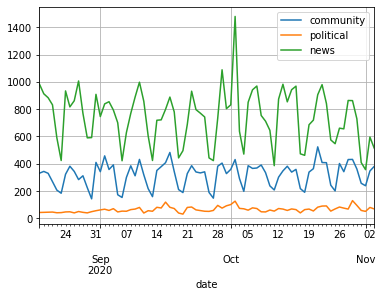

In [18]:
dc = dc.set_index((dc.date), drop = True)

dc.index = pd.DatetimeIndex(dc.index)

dc.community.plot(grid=True, label="community", legend=True)
dc.political.plot(grid=True, label="political", legend=True)
dc.news.plot(grid=True,label="news", legend=True)


dc = dc.set_index(pd.to_datetime(dc.date), drop = True)
dc.community.plot(grid=True, label="community", legend=True)
dc.political.plot(grid=True, label="political", legend=True)

In [24]:
print(date)

[datetime.date(2020, 8, 18), datetime.date(2020, 8, 19), datetime.date(2020, 8, 20), datetime.date(2020, 8, 21), datetime.date(2020, 8, 22), datetime.date(2020, 8, 23), datetime.date(2020, 8, 24), datetime.date(2020, 8, 25), datetime.date(2020, 8, 26), datetime.date(2020, 8, 27), datetime.date(2020, 8, 28), datetime.date(2020, 8, 29), datetime.date(2020, 8, 30), datetime.date(2020, 8, 31), datetime.date(2020, 9, 1), datetime.date(2020, 9, 2), datetime.date(2020, 9, 3), datetime.date(2020, 9, 4), datetime.date(2020, 9, 5), datetime.date(2020, 9, 6), datetime.date(2020, 9, 7), datetime.date(2020, 9, 8), datetime.date(2020, 9, 9), datetime.date(2020, 9, 10), datetime.date(2020, 9, 11), datetime.date(2020, 9, 12), datetime.date(2020, 9, 13), datetime.date(2020, 9, 14), datetime.date(2020, 9, 15), datetime.date(2020, 9, 16), datetime.date(2020, 9, 17), datetime.date(2020, 9, 18), datetime.date(2020, 9, 19), datetime.date(2020, 9, 20), datetime.date(2020, 9, 21), datetime.date(2020, 9, 22), 

In [20]:
community = [0]
political = [0]
news = [0]
date = [0]

for index, row in df.iterrows():
    if index[0] not in date:
        date.append(index[0])
    if index[1] == 'community':
        community.append(row[0] + community[-1])
    if index[1] == 'news':
        news.append(row[0] + news[-1])
    if index[1] == 'political':
        political.append(row[0] + political[-1])

        
community.pop(0)
political.pop(0)
news.pop(0)
date.pop(0)
print(len(community))
print(len(political))
print(len(news))
print(len(date))

78
78
78
78


In [21]:
dc = {'date': date, 'community':community, "news": news, "political": political}

In [22]:
dc = pd.DataFrame(dc)

<AxesSubplot:xlabel='date'>

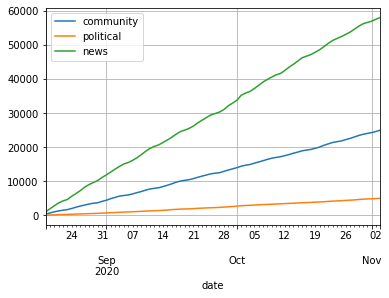

In [23]:
dc = dc.set_index(pd.to_datetime(dc.date), drop = True)
dc.community.plot(grid=True, label="community", legend=True)
dc.political.plot(grid=True, label="political", legend=True)
dc.news.plot(grid=True,label="news", legend=True)

In [ ]:
date = []

for x in t['converted_date']:
    if x not in date:
        date.append(x)
        
len(date)

In [26]:
abortion = []
crime = []
covid = []
climate = []
gun = []
immigration = []
racism = []
supreme = []
total = []
economy = []
ndate = []

for i in range(len(date)):
    abortion.append(0)
    crime.append(0)
    covid.append(0)
    climate.append(0)
    economy.append(0)
    gun.append(0)
    immigration.append(0)
    racism.append(0)
    supreme.append(0)
    total.append(0)
    ndate[i] = len(ndate[0:i])

for index, row in t.iterrows():
    if row['group'] == 'community':
        ind = date.index(row['converted_date'])
        total[ind] = total[ind] + 1
        if row['type'] == 'abortion':
            abortion[ind] = abortion[ind] + 1
        if row['type'] == 'climate':
            climate[ind] = climate[ind] + 1
        if row['type'] == 'covid':
            covid[ind] = covid[ind] + 1
        if row['type'] == 'crime':
            crime[ind] = crime[ind] + 1
        if row['type'] == 'economy':
            economy[ind] = economy[ind] + 1
        if row['type'] == 'gun':
            gun[ind] = gun[ind] + 1
        if row['type'] == 'immigration':
            immigration[ind] = immigration[ind] + 1
        if row['type'] == 'racism':
            racism[ind] = racism[ind] + 1
        if row['type'] == 'supreme':
            supreme[ind] = supreme[ind] + 1
            
print(ndate)

IndexError: list assignment index out of range

In [ ]:
tc = {'date': date, "total":total, 'abortion':abortion, "crime": crime, "covid": covid, "economy": economy, "gun": gun, "immigration":immigration, "racism":racism, "supreme":supreme}

In [ ]:
tc = pd.DataFrame(tc)

In [ ]:
tc = tc.set_index(pd.to_datetime(tc.date), drop = True)
tc.total.plot(grid=True, label="total", legend=True)
tc.abortion.plot(grid=True,label='abortion', legend =True)
tc.crime.plot(grid=True,label='crime', legend =True)
tc.covid.plot(grid=True,label='covid', legend =True)
tc.economy.plot(grid=True,label='economy', legend =True)
tc.gun.plot(grid=True,label='gun', legend =True)
tc.immigration.plot(grid=True,label='immigration', legend =True)
tc.racism.plot(grid=True,label='racism', legend =True)
tc.supreme.plot(grid=True,label='supreme', legend =True)

plt.pyplot.legend(bbox_to_anchor=(1.05, 1), loc =2, borderaxespad=0.)

In [ ]:
for i in range(len(date)):
    if i != 0:
        l = i -1
        total[i] = total[i] + total[l]

In [ ]:
print(total)

In [ ]:
fc = {'date': date, "total":total}

In [ ]:
fc = pd.DataFrame(fc)

In [ ]:
sns.lineplot(data=fc, x="date", y="total")